In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import os
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from keras.layers import Activation, Dense, Flatten
from sklearn.model_selection import train_test_split


# In[2]:

path = os.listdir('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')
path_name = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

# In[3]:


classes = ['Cyst','Normal','Stone','Tumor']
def obtain_data(X,Y,path):
    for i in classes:
        path_new = os.path.join(path,i)
        for j in os.listdir(path_new):
            img = cv2.imread(os.path.join(path_new,j))
            img = cv2.resize(img,(128,128))
            X.append(img)
            Y.append(i)


# In[4]:


images = []
labels = []
obtain_data(images,labels,path_name)


# In[5]:

images = np.array(images)
labels = np.array(labels)
X_train,X_test,Y_train,Y_test = train_test_split(images, labels, test_size=0.2)


# In[6]:


X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
y_train_new = []
for i in Y_train:
    y_train_new.append(classes.index(i))
Y_train = y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)
y_test_new = []
for i in Y_test:
    y_test_new.append(classes.index(i))
Y_test = y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)


# Converging Path :
# 
# Layer 1

# In[7]:


inputs = tf.keras.layers.Input((128,128,3))
s = tf.keras.layers.Lambda(lambda x:x/255)(inputs)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(s)
c1 = tf.keras.layers.Dropout(0.2)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c1)


# Layer 2

# In[8]:


c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.3)(c2)
c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c2)


# Layer 3

# In[9]:


c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c3)


# Layer 4

# In[10]:


c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c4)


# Layer 5

# In[11]:


c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)


# Expansive Path:
# 
# Layer 1

# In[12]:


u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.3)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c6)


# Layer 2

# In[13]:


u7 = tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.3)(c7)
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c7)


# Layer 3

# In[14]:


u8 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
u8 = tf.keras.layers.Dropout(0.2)(u8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c8)


# Layer 4

# In[15]:


u9 = tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1])
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c9)


# Layer 5

# In[16]:

c10 = tf.keras.layers.Conv2D(4,(1,1),activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01))(c9)
c10 = tf.keras.layers.Dropout(0.3)(c10)
c10= tf.keras.layers.Flatten()(c10)
c12= tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.L2(0.01),activity_regularizer=tf.keras.regularizers.L1(0.01))(c10)
c12 = tf.keras.layers.Dropout(0.2)(c12)
outputs = tf.keras.layers.Dense(4,activation = 'softmax')(c12)


# In[17]:


model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'], sample_weight_mode='temporal')
model.summary()



# Early Stopping

# In[19]:


callbacks = [tf.keras.callbacks.ModelCheckpoint('KIDNEY_DIAGNOSIS_MODEL.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.01,patience=20,verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]


# In[ ]:


results = model.fit(X_train,Y_train,validation_split=0.2,batch_size=64,epochs=200,callbacks=callbacks)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

2023-09-03 19:25:07.972435: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 [==============================] - ETA: 0s - loss: 3.5794 - accuracy: 0.5897
Epoch 1: val_loss improved from inf to 1.60251, saving model to KIDNEY_DIAGNOSIS_MODEL.h5
125/125 [==============================] - 35s 136ms/step - loss: 3.5794 - accuracy: 0.5897 - val_loss: 1.6025 - val_accuracy: 0.6812
Epoch 2/200
125/125 [==============================] - ETA: 0s - loss: 1.2649 - accuracy: 0.9282
Epoch 2: val_loss improved from 1.60251 to 1.35123, saving model to KIDNEY_DIAGNOSIS_MODEL.h5
125/125 [==============================] - 16s 126ms/step - loss: 1.2649 - accuracy: 0.9282 - val_loss: 1.3512 - val_accuracy: 0.8810
Epoch 3/200
125/125 [==============================] - ETA: 0s - loss: 1.1304 - accuracy: 0.9622
Epoch 3: val_loss improved from 1.35123 to 1.17756, saving model to KIDNEY_DIAGNOSIS_MODEL.h5
125/125 [==============================] - 16s 126ms/step - loss: 1.1304 - accuracy: 0.9622 - val_loss: 1.1776 - val_accuracy: 0.9252
Epoch 4/200
125/125 [====================

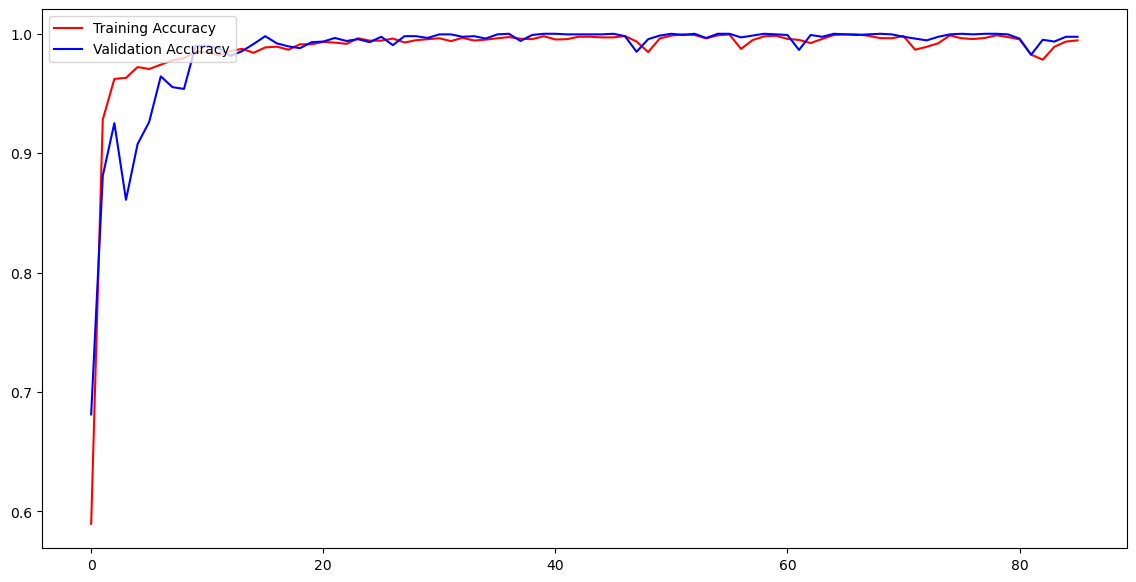

In [2]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


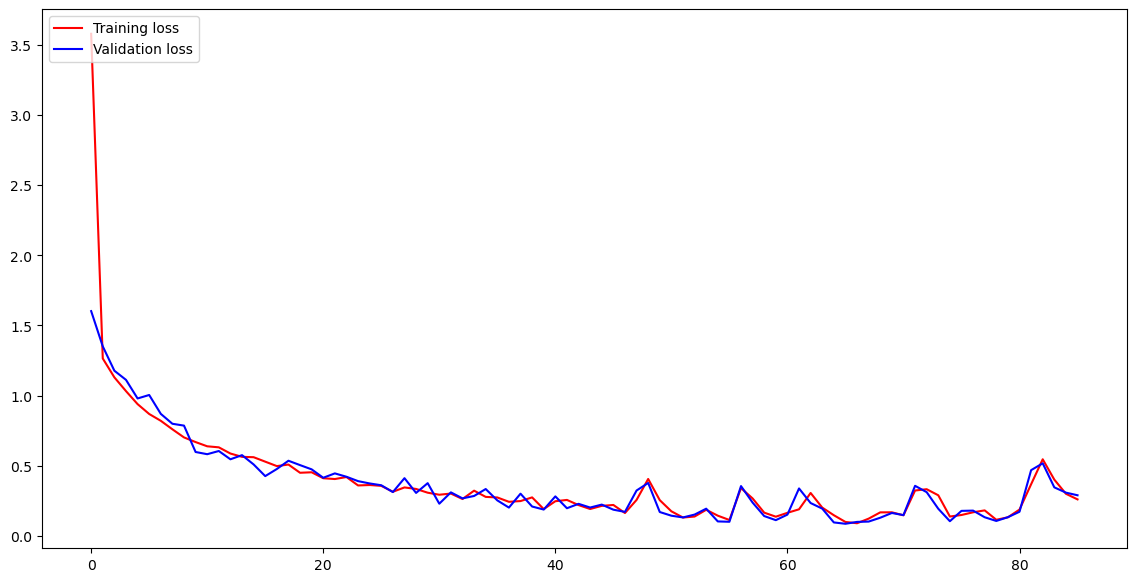

In [3]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [4]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_test.shape)
score = model.evaluate(X_test, Y_test, verbose = 1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

(2490, 128, 128, 3)
78/78 [==============================] - 2s 17ms/step - loss: 0.3009 - accuracy: 0.9968
Test loss: 0.3009190559387207
Test accuracy: 0.9967871308326721


In [5]:
def pred_name(n):
    print(classes[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2482005398.py, line 2)

In [ ]:
realimg = '/kaggle/input/google1/images.jpg'
img1 = cv2.imread(realimg)
img1 = cv2.resize(img1,(128,128))
img1 =  np.array(img1)
img1 = img1.reshape(1,128,128,3)

prediction = model.predict(img1)
pred_val_1 = prediction.argmax()
n1 = pred_val_1.item()

img_plot = plt.imshow(mpimg.imread(realimg))
plt.show()
print(n1)
pred_name(n1)